In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin

# 1. Get data

In [2]:
data = load_boston()
X = data.data
y = data.target

CRIM: crime rate per capita in towns

ZN: Proportion of residential land for parcels larger than 25,000 square feet

INDUS: Proportion of non-retail business acres per town. RMmm

CHAS: Charles River dummy variable (equal to 1 if the river is around the river; otherwise equal to 0)

NOX: concentration of nitric oxide (parts per million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied housing built before 1940

DIS: Weighted distance to five Boston job centers

RAD: An indicator of radial road accessibility

TAX: Full-value property tax rate per $10,000

PTRATIO: Teacher-student ratio by town

B: Calculated as 1000 (Bk-0.63)², where Bk is the proportion of African Americans by town

LSTAT: Percentage of bottom population

MEDV: Median number of owner-occupied dwellings in $1000

# 2. Divide training set and testing set

In [3]:
# Allocate Data Set - Training Sets and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)
train_df = pd.DataFrame(X_train, columns = data.feature_names)
test_df = pd.DataFrame(X_test, columns = data.feature_names)
# Concatenate the training and test sets of X
df = pd.concat([train_df,test_df],ignore_index=True,sort=False)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
test_set = {"y_test":y_test}
test_set = pd.DataFrame(test_set)
test_set.to_csv('y_test.csv')
df

404
102
404
102


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# 3. Exploratory Data Analysis

### 3.1 Distribution histogram of each feature

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

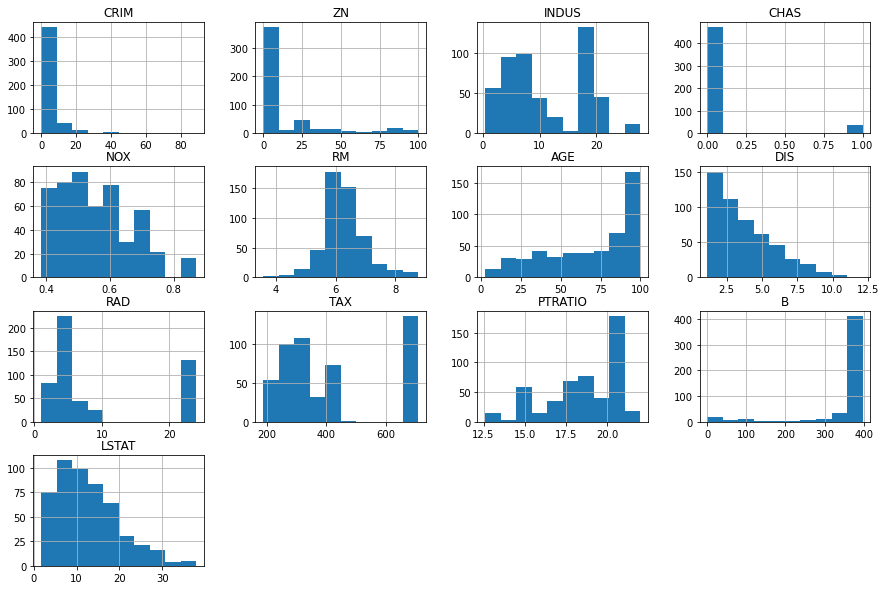

In [5]:
# Feature histogram
df.hist(figsize=(15,10))

### 3.2 Scatter plot of the relationship between each feature and house price

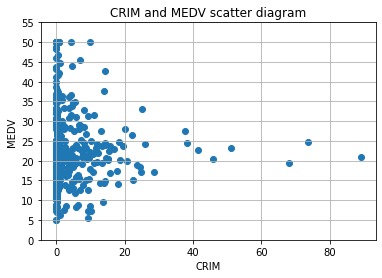

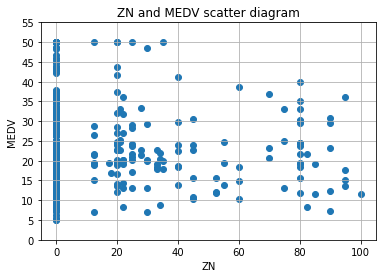

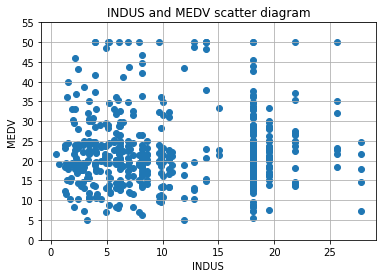

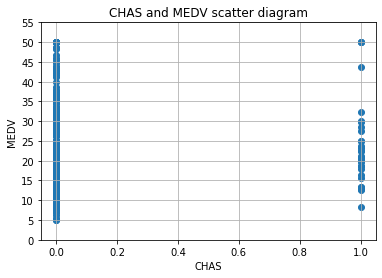

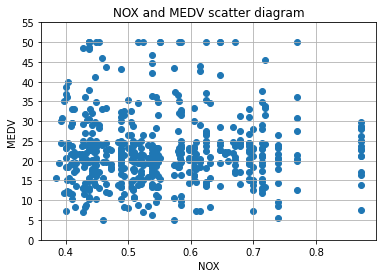

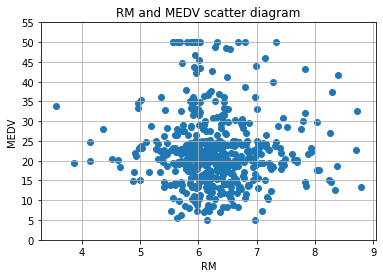

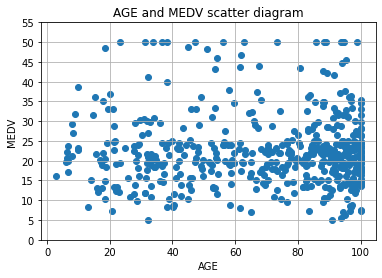

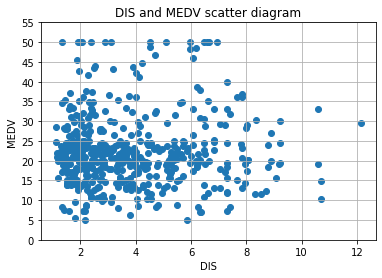

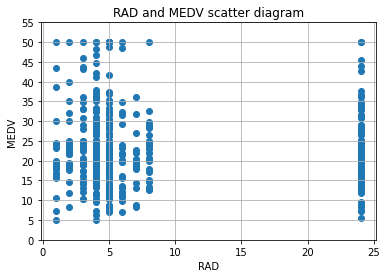

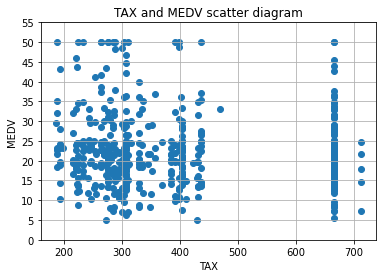

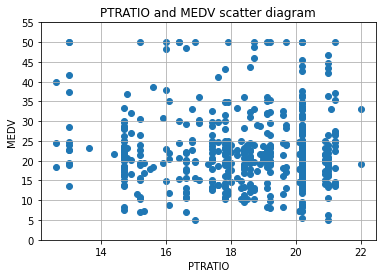

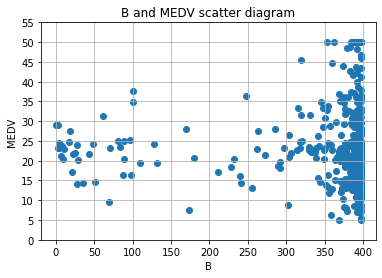

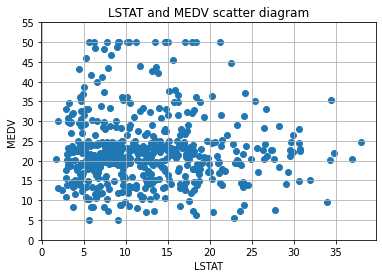

In [6]:
# Draw scatterplots of house prices by each feature
for each in data.feature_names:
    plt.scatter(df[each],y)
    plt.title(each + ' and MEDV scatter diagram')
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

### 3.3 Heatmap

<AxesSubplot:>

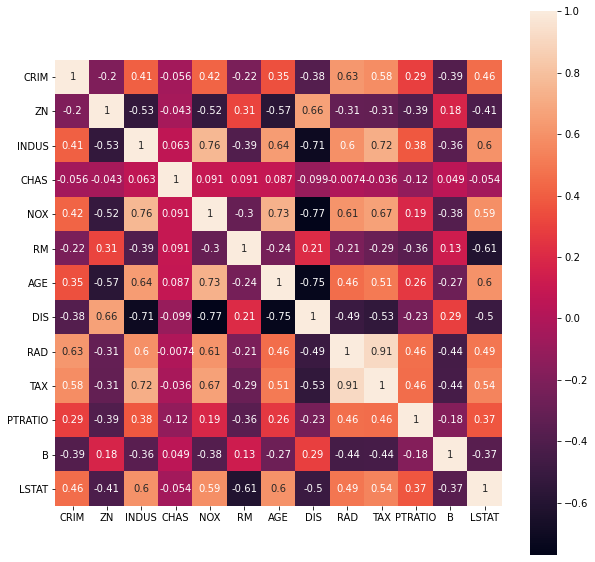

In [7]:
# Plot a heatmap of the relationship between individual features
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)

### 3.4 Distribution of house prices

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

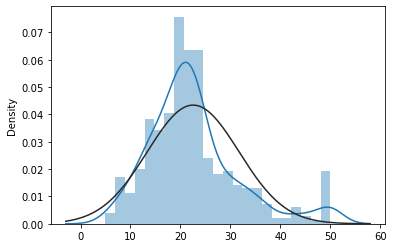

In [8]:
# Draw a house price distribution graph to see if the house price distribution is a normal distribution
sns.distplot(y,fit=stats.norm)

### 3.5 Probability Map

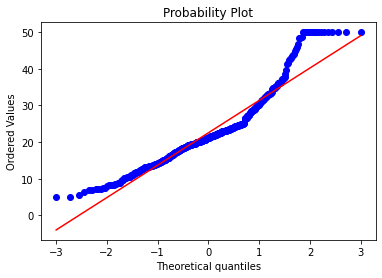

In [9]:
res = stats.probplot(y, plot=plt)

# 4. Data processing

### 4.1 Logarithmic transformation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

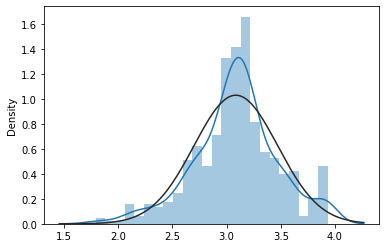

In [10]:
# The distribution of the data does not follow a normal distribution, so a log transformation may be required
y_log = np.log1p(y)
sns.distplot(y_log, fit=stats.norm)

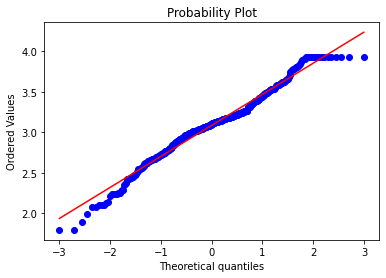

In [11]:
res = stats.probplot(y_log, plot=plt)

In [12]:
# Test R^2 score of the model before and after log transformation on a ridge regression model
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model before log transforamtion:{:,.10f}".format(test_reg_score))
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
test_reg_log = Ridge()
test_reg_log.fit(X_train, y_train_log)
test_reg_y_predict_log = test_reg_log.predict(X_test)
test_reg_score_log = r2_score(y_test_log, test_reg_y_predict_log)
print ("R^2 score of the test model after log transforamtion:{:,.10f}".format(test_reg_score_log))

R^2 score of the test model before log transforamtion:0.6816407322
R^2 score of the test model after log transforamtion:0.7219696773


In [13]:
# test2_reg = SVR()
# test2_reg.fit(X_train, y_train)
# test2_reg_y_predict = test2_reg.predict(X_test)
# test2_reg_score = r2_score(y_test, test2_reg_y_predict)
# print ("R^2 score of the test model2 before log transforamtion:{:,.10f}".format(test2_reg_score))

# test2_reg_log = SVR()
# test2_reg_log.fit(X_train, y_train_log)
# test2_reg_y_predict_log = test2_reg_log.predict(X_test)
# test2_reg_score_log = r2_score(y_test_log, test2_reg_y_predict_log)
# print ("R^2 score of the test model2 after log transforamtion:{:,.10f}".format(test2_reg_score_log))

### 4.2 Missing value processing

In [14]:
# Check for missing values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### 4.3 Remove some features

In [15]:
# View the relationship between the features and MEDV
y_train_df = pd.DataFrame(y_train, columns = ['MEDV'])
y_test_df = pd.DataFrame(y_test, columns = ['MEDV'])
y_df = pd.concat([y_train_df,y_test_df],ignore_index=True,sort=False)
xy_df = pd.concat([df,y_df],axis=1)
# xy_df.to_csv('boston.csv')
xy_df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

<AxesSubplot:>

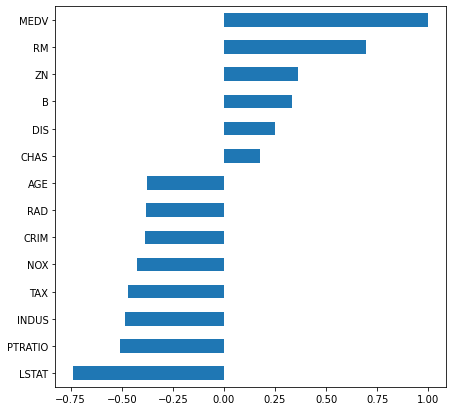

In [77]:
# Visualize the relationship between features and MEDV through graphs
corr = xy_df.corr()['MEDV']
corr_plot = corr.copy()
corr_plot.sort_values(ascending=True,inplace=True)
corr_plot.plot.barh(figsize=(7,7))

In [17]:
feature_names = load_boston().feature_names
score = {}
# Test R^2 score of the model before removing any features on a ridge regression model
print("Before removing any features:")
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model:{:,.10f}".format(test_reg_score))
score['Original'] = test_reg_score
# Test R^2 score of the model after removing each feature on a ridge regression model
for i in range(13):
    X_train_d = np.delete(X_train,i,axis=1)
    X_test_d = np.delete(X_test,i,axis=1)
    test_reg_d = Ridge()
    test_reg_d.fit(X_train_d, y_train)
    test_reg_y_predict_d = test_reg_d.predict(X_test_d)
    test_reg_score_d = r2_score(y_test, test_reg_y_predict_d)
    print ("After removing %s: "%(feature_names[i]))
    print ("R^2 score of the test model:{:,.10f}".format(test_reg_score_d))
    score[feature_names[i]] = test_reg_score_d

Before removing any features:
R^2 score of the test model:0.6816407322
After removing CRIM: 
R^2 score of the test model:0.6856170444
After removing ZN: 
R^2 score of the test model:0.6664230707
After removing INDUS: 
R^2 score of the test model:0.6815856576
After removing CHAS: 
R^2 score of the test model:0.6826652669
After removing NOX: 
R^2 score of the test model:0.6629871769
After removing RM: 
R^2 score of the test model:0.6413203629
After removing AGE: 
R^2 score of the test model:0.6818477898
After removing DIS: 
R^2 score of the test model:0.6246593144
After removing RAD: 
R^2 score of the test model:0.6574795642
After removing TAX: 
R^2 score of the test model:0.6681304224
After removing PTRATIO: 
R^2 score of the test model:0.6492138623
After removing B: 
R^2 score of the test model:0.6674864669
After removing LSTAT: 
R^2 score of the test model:0.6093221410


<AxesSubplot:>

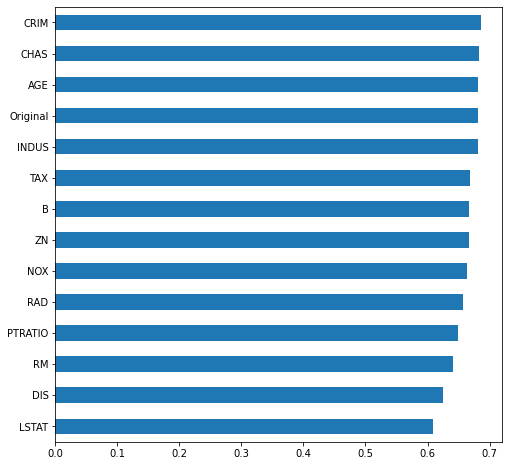

In [18]:
# Visualize the results of the R^2 score without removing any featur and after removing each feature
score = pd.Series(score)
score_plot = score.copy()
score_plot.sort_values(ascending=True,inplace=True)
score_plot.plot.barh(figsize=(8,8))

# 5. Feature Engineering

### 5.1 Data Augmentation

In [19]:
split_features = {
    'CRIM':3,
    'ZN':3,
    'INDUS':4,
    'NOX':5,
    'RM':3,
    'AGE':7,
    'DIS':3,
    'RAD':2,
    'TAX':4,
    'PTRATIO':3,
    'B':4,
    'LSTAT':5
}

In [20]:
df_con = df
for f,g in split_features.items():
    new = pd.cut(df[f],g)
    onehot = pd.get_dummies(new,prefix=f)
    df_con = pd.concat([df_con, onehot], axis=1)
df_con

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,"PTRATIO_(18.867, 22.0]","B_(-0.0766, 99.465]","B_(99.465, 198.61]","B_(198.61, 297.755]","B_(297.755, 396.9]","LSTAT_(1.694, 8.978]","LSTAT_(8.978, 16.226]","LSTAT_(16.226, 23.474]","LSTAT_(23.474, 30.722]","LSTAT_(30.722, 37.97]"
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,...,1,0,0,0,1,1,0,0,0,0
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,...,1,0,0,0,1,1,0,0,0,0
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,...,1,0,0,0,1,0,1,0,0,0
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,...,0,0,0,0,1,1,0,0,0,0
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,...,1,0,0,0,1,0,1,0,0,0
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,...,0,0,0,0,1,1,0,0,0,0
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,...,1,0,0,0,1,0,1,0,0,0
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,...,1,0,0,0,1,0,0,0,0,1


### 5.2 Standardization

In [21]:
# Data normalization after data augmentation
scaler = StandardScaler()
train_X_len = X_train.shape[0]
train_X = df_con[:train_X_len]
test_X = df_con[train_X_len:]
X_train_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [22]:
# Use PCA to select and reduce the number of features and reduce the dimension to 50
pca = PCA(n_components=50)
X_train_scaled = pca.fit_transform(X_train_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [23]:
# print(X_test[0])
# # X_test=np.append(X_test,[2.818380,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42])
d=np.array([2.81838e+00,0.00000e+00,1.81000e+01,0.00000e+00,5.32000e-01,5.76200e+00,4.03000e+01,4.09830e+00,2.40000e+01,6.66000e+02,2.02000e+01,3.92920e+02,1.04200e+01])
X_test0=np.insert(X_test,0,d,axis=0)
print(X_test0)

# Data normalization without data augmentation
transfer  = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)

print(X_test0)
X_test0 = transfer.fit_transform(X_test0)
print(X_test0)

[[2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [4.54400e-02 0.00000e+00 3.24000e+00 ... 1.69000e+01 3.68570e+02
  9.09000e+00]
 ...
 [2.68380e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  1.41000e+01]
 [1.11081e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.47700e+01]
 [5.44114e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.55290e+02
  1.77300e+01]]
[[2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [4.54400e-02 0.00000e+00 3.24000e+00 ... 1.69000e+01 3.68570e+02
  9.09000e+00]
 ...
 [2.68380e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  1.41000e+01]
 [1.11081e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.47700e+01]
 [5.44114e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.55290e+02
  1.77300e+01]]
[[ 0.12722226 -0

# 6. Modeling comparison

## 6.1 Linear Regression Model

### Method 1: Linear regression log

### Without data augmentation

In [24]:
# Linear regression module instantiates an object
lin_reg = LinearRegression()
# Fit the training set with the linear regression module
lin_reg.fit(X_train, y_train_log)
# Get the predicted value
lin_reg_y_predict=lin_reg.predict(X_test)
# Get the R^2 score of the trained model
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.6645740822 on test data.


array([3.09991598, 3.1481634 , 3.39441833, 2.78017077, 2.38942475,
       2.78872525, 3.20599756, 3.30852657, 3.33292678, 2.90381834,
       3.22698316, 3.48645081, 2.4996232 , 3.14281915, 3.15817907,
       3.49806443, 2.80770331, 2.93502074, 3.11062508, 2.90180087,
       3.29106004, 3.30274066, 3.0117067 , 3.50575342, 3.0328315 ,
       1.97545823, 3.75334476, 2.93200042, 3.22352151, 3.22703403,
       3.29067698, 3.54054492, 3.2125636 , 3.4185683 , 3.2880477 ,
       3.52324213, 3.29300783, 3.28667084, 2.02866859, 3.40517474,
       3.16344681, 3.28040321, 2.79247261, 2.79686683, 3.00792228,
       3.01616937, 3.18037337, 3.58867585, 3.01729245, 2.94378409,
       2.16117449, 3.40348995, 3.20280071, 3.88253022, 3.35620242,
       2.2232303 , 3.43862253, 3.65642534, 3.37106856, 3.11207782,
       3.20190491, 3.0284252 , 2.85555469, 2.89554645, 3.29552503,
       3.41974236, 3.31862129, 3.29347363, 3.25963995, 3.7155864 ,
       3.40849236, 3.61291919, 3.03199814, 3.34463194, 2.45104

In [25]:
def figure_prediction(y_real, y_predict):
    plt.figure(figsize=(20,5))
    plt.xlabel('id', fontsize=15)
    plt.ylabel('MEDV', fontsize=15)
    plt.plot(np.arange(0,y_real.shape[0]), y_real, c='green', linestyle='--')
    plt.plot(np.arange(0,y_real.shape[0]), y_predict, c='red', linestyle='-.')

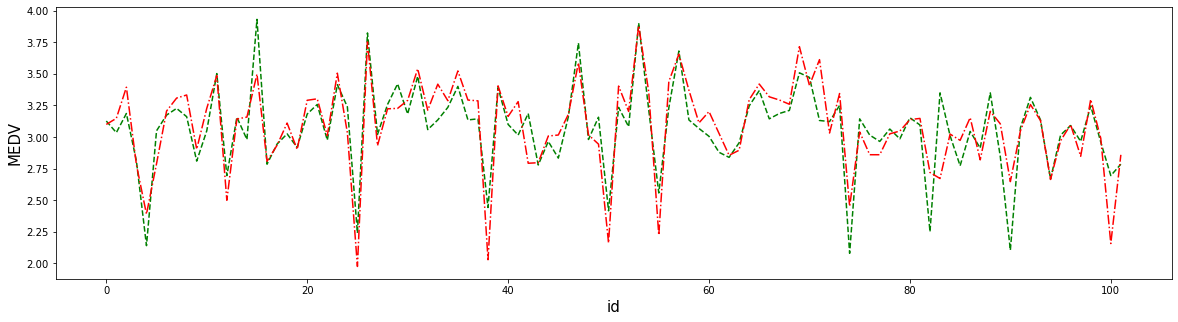

In [26]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lin_reg_y_predict)

### with data augmentation

In [27]:
# Linear regression module instantiates an object
lin_reg = LinearRegression()
# Fit the training set with the linear regression module
lin_reg.fit(X_train_scaled, y_train_log)
# Get the predicted value
lin_reg_y_predict=lin_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.7766367935 on test data.


array([3.15360819, 3.10463095, 3.29758011, 2.89514384, 2.39955273,
       2.86553891, 3.13189563, 3.28455196, 3.1720217 , 2.83205359,
       3.06307767, 3.29463767, 2.65094269, 3.01012273, 3.09405284,
       3.68561837, 2.79601975, 2.94131393, 3.10469752, 2.8700234 ,
       3.24140163, 3.3056183 , 3.10107954, 3.34616234, 3.17373013,
       2.17493781, 3.7237732 , 2.97977416, 3.21476821, 3.14965793,
       3.28873534, 3.42102783, 3.15416994, 3.47858103, 3.33230259,
       3.40347818, 3.16956348, 3.23266088, 2.23937196, 3.30323445,
       3.12029787, 3.14631033, 2.72338444, 2.74837783, 2.98692324,
       2.96905832, 3.13204186, 3.4785953 , 3.02766782, 2.87859078,
       2.39353339, 3.23285801, 3.13888753, 3.7881877 , 3.26607735,
       2.65654475, 3.35410626, 3.6366753 , 3.12866709, 3.09841419,
       3.18828234, 3.12566499, 2.80621509, 3.00279879, 3.18614676,
       3.23107665, 3.20417914, 3.09579048, 3.2203126 , 3.63319155,
       3.36615481, 3.6901459 , 3.01616357, 3.25938498, 2.54626

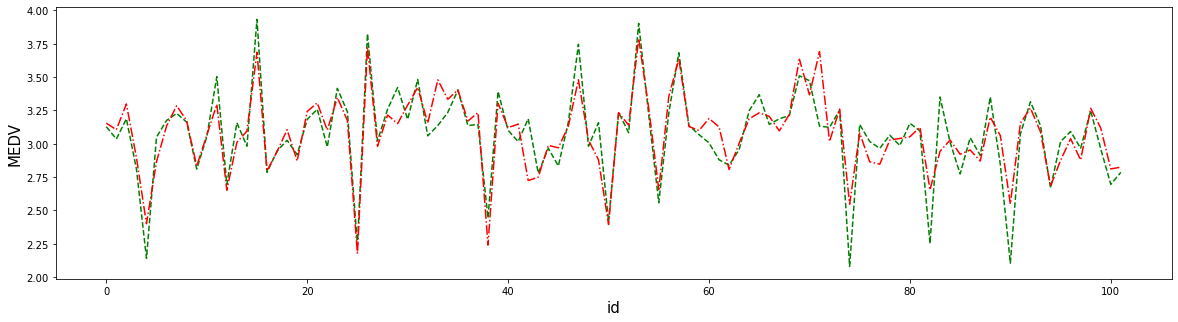

In [28]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lin_reg_y_predict)

### Grid Search

In [29]:
# Use Grid_Search to get the best parameters for the model
def grid_search(model, X, y, params):
    grid = GridSearchCV(estimator = model, param_grid = params, scoring = "r2", cv = 5)
    grid.fit(X,y)
    # Specify the model as the model corresponding to the best parameter
    best_model = grid.best_estimator_
    # View the best parameters and best score
    print("Parameters are {} for the optimal model.".format(grid.best_params_))
    print("Optimal model has best score {:,.10f}.".format(grid.best_score_))
    # View the test score of the model with different parameters
    for i in range(len(grid.cv_results_['mean_test_score'])):
        print(grid.cv_results_['params'][i], "Test score: {:,.10f}".format(grid.cv_results_['mean_test_score'][i]))
    return best_model

### Method 2: Ridge regression (log)

### Without data augmentation

In [30]:
# training set
# Get the best parameters for the model 
ridge_reg = grid_search(Ridge(),X_train,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# Use the best model to make predictions
ridge_reg_y_predict = ridge_reg.predict(X_test)
# Get the R^2 score of the trained model
# ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 10} for the optimal model.
Optimal model has best score 0.7914954146.
{'alpha': 0.001} Test score: 0.7910541613
{'alpha': 0.01} Test score: 0.7910572027
{'alpha': 0.05} Test score: 0.7910706178
{'alpha': 0.1} Test score: 0.7910871544
{'alpha': 0.5} Test score: 0.7912104852
{'alpha': 1} Test score: 0.7913437575
{'alpha': 10} Test score: 0.7914954146
{'alpha': 20} Test score: 0.7896578728


array([3.07566275, 3.1807755 , 3.37594139, 2.79519732, 2.40752657,
       2.77845082, 3.20089934, 3.30636207, 3.3187472 , 2.93511186,
       3.21432661, 3.49209372, 2.53689804, 3.14258567, 3.1488082 ,
       3.47280361, 2.82497434, 2.94857145, 3.08255939, 2.91384167,
       3.28553903, 3.30002395, 3.04666167, 3.50022677, 3.04745763,
       2.00801583, 3.74103901, 2.94046661, 3.20720079, 3.21610485,
       3.30010681, 3.5233538 , 3.20361035, 3.40538123, 3.29108097,
       3.51491996, 3.29403173, 3.27164627, 2.04034423, 3.38120738,
       3.17291648, 3.27225416, 2.79014206, 2.78646756, 3.02044364,
       3.00192461, 3.17352014, 3.56786625, 3.02877934, 2.93919677,
       2.16918034, 3.38515098, 3.20205145, 3.85499147, 3.33887393,
       2.21266488, 3.41108588, 3.66447441, 3.37844636, 3.10922431,
       3.20525904, 3.03853523, 2.85361413, 2.91839515, 3.30746357,
       3.41609375, 3.30768313, 3.28908018, 3.24527863, 3.70021746,
       3.42203246, 3.62368712, 3.04919282, 3.33516093, 2.50323

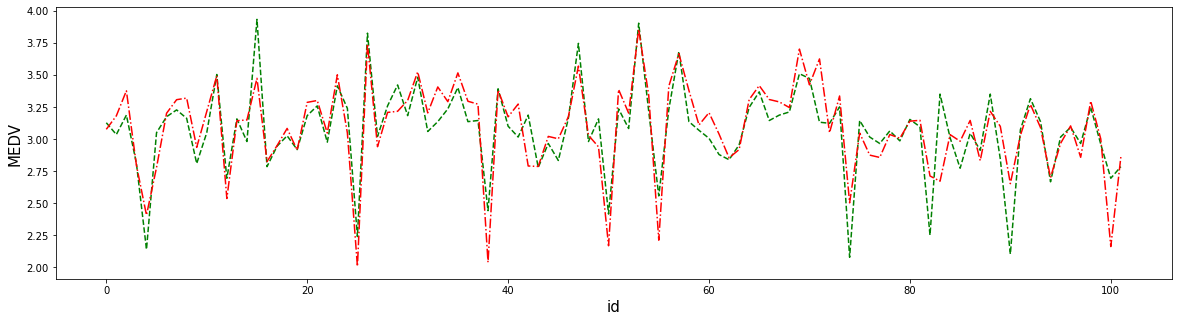

In [31]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ridge_reg_y_predict)

### With data augmentation

In [32]:
# training set
# Get the best parameters for the model 
ridge_reg = grid_search(Ridge(),X_train_scaled,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# Use the best model to make predictions
ridge_reg_y_predict = ridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 1} for the optimal model.
Optimal model has best score 0.8291978390.
{'alpha': 0.001} Test score: 0.8281045342
{'alpha': 0.01} Test score: 0.8281320928
{'alpha': 0.05} Test score: 0.8282467159
{'alpha': 0.1} Test score: 0.8283736607
{'alpha': 0.5} Test score: 0.8289648596
{'alpha': 1} Test score: 0.8291978390
{'alpha': 10} Test score: 0.8256518358
{'alpha': 20} Test score: 0.8213904289


array([3.18738542, 3.11398647, 3.25422154, 2.9543623 , 2.41221131,
       2.90696826, 3.15505555, 3.24400517, 3.21728173, 2.83979615,
       3.06953946, 3.38269799, 2.69575019, 3.03268846, 3.12140688,
       3.67711715, 2.78170691, 2.94863418, 3.12825847, 2.84605035,
       3.22225168, 3.27894384, 3.10775262, 3.39540555, 3.12555558,
       2.25657947, 3.70154625, 2.94512424, 3.24922839, 3.1843927 ,
       3.30027322, 3.46720991, 3.13896264, 3.3585579 , 3.2918416 ,
       3.42924163, 3.18945567, 3.18512376, 2.18088857, 3.25629174,
       3.08289452, 3.1407004 , 2.70195688, 2.74653859, 2.98022835,
       2.93874022, 3.16697891, 3.47183076, 2.9918676 , 2.87106927,
       2.32783283, 3.25116035, 3.11277078, 3.79886501, 3.22004033,
       2.5978956 , 3.35505097, 3.59689645, 3.18432349, 3.03698465,
       3.1435208 , 3.04903396, 2.80077214, 3.02057599, 3.23351213,
       3.24964799, 3.20855597, 3.16332422, 3.22833478, 3.5861072 ,
       3.38144368, 3.63699327, 3.00734602, 3.23401891, 2.57360

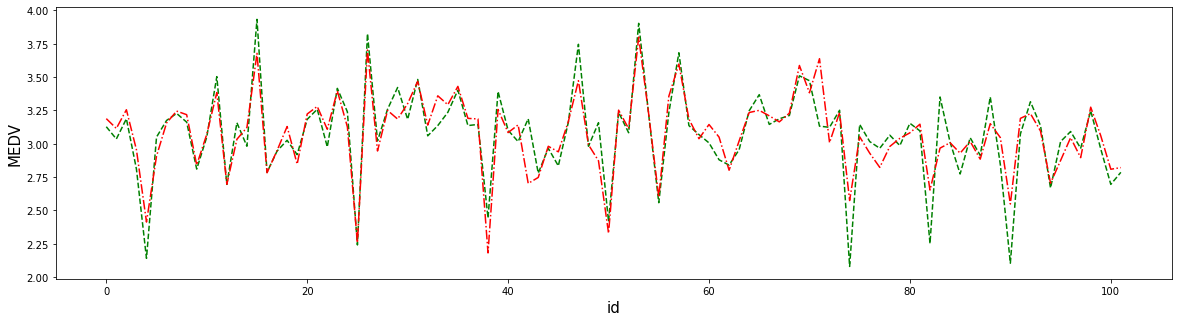

In [33]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ridge_reg_y_predict)

In [34]:
# testing set
ridge_alpha = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]
for i in ridge_alpha:
    # The ridge regression module instantiates an object
    ridge_reg = Ridge(alpha=i)
    # Fit the training set with the ridge regression module
    ridge_reg.fit(X_train_scaled, y_train_log)
    # Model evaluation
    ridge_reg_y_predict = ridge_reg.predict(test_X_scaled)
    ridge_reg_score = r2_score(y_test_log, ridge_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(ridge_reg_score))

alpha:0.001    R^2 score:0.7872096114
alpha:0.01    R^2 score:0.7872913565
alpha:0.05    R^2 score:0.7876428145
alpha:0.1    R^2 score:0.7880563752
alpha:0.5    R^2 score:0.7905597570
alpha:1    R^2 score:0.7923795937
alpha:10    R^2 score:0.7879944407
alpha:20    R^2 score:0.7781435733


### Method 3: Lasso regression (log)

### Without data augmentation

In [35]:
# training set
# Get the best parameters for the model
lasso_reg = grid_search(Lasso(),X_train,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# Use the best model to make predictions
lasso_reg_y_predict = lasso_reg.predict(X_test)
# Get the R^2 score of the trained model
# lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.7912468200.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.7912468200
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.7864386868
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7766929808
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7597821061
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7499404399
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7366029669
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7230197826
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6306112776


array([3.08964077, 3.17517229, 3.38220658, 2.79241257, 2.3981984 ,
       2.78479095, 3.20264754, 3.31034188, 3.33082498, 2.92509109,
       3.2170205 , 3.48453283, 2.51732303, 3.14476315, 3.15538987,
       3.48674055, 2.81387482, 2.93745919, 3.09334407, 2.9080596 ,
       3.29092053, 3.30517897, 3.03298884, 3.51071839, 3.04611987,
       1.99080668, 3.74633716, 2.93724175, 3.21558255, 3.22244585,
       3.29292068, 3.53875733, 3.20959423, 3.4100388 , 3.29209344,
       3.51965873, 3.29398985, 3.27625826, 2.03311022, 3.3885448 ,
       3.17227139, 3.27403977, 2.79082322, 2.79152784, 3.01313087,
       3.00259626, 3.17923097, 3.57687375, 3.02360424, 2.93734869,
       2.16192755, 3.39253955, 3.2039073 , 3.86077426, 3.34668352,
       2.21907439, 3.42453573, 3.66238908, 3.37465001, 3.10723143,
       3.20797115, 3.0362306 , 2.85361226, 2.90672907, 3.30006939,
       3.41954736, 3.31630418, 3.29689149, 3.25068727, 3.7065741 ,
       3.41828337, 3.6173018 , 3.04505799, 3.33616093, 2.47711

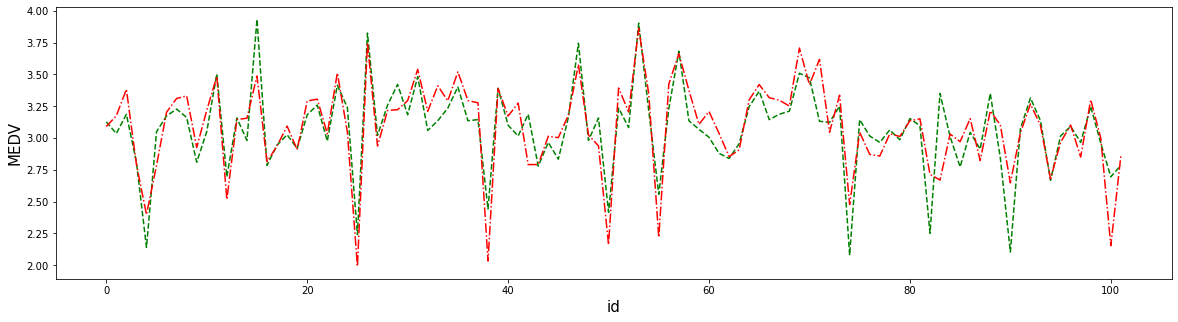

In [36]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lasso_reg_y_predict)

### With data augmentation

In [37]:
# training set
# Get the best parameters for the model
lasso_reg = grid_search(Lasso(),X_train_scaled,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# Use the best model to make predictions
lasso_reg_y_predict = lasso_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.8326263099.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.8326263099
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.8176017782
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7916897118
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7707489534
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7505551728
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7361717555
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7239874882
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6579232582
Optimal model has R^2 score 0.7908607225 on test data.


array([3.19529066, 3.13347253, 3.27578049, 2.96249927, 2.41530114,
       2.91942521, 3.15856687, 3.2612196 , 3.22876661, 2.86595257,
       3.09347385, 3.41750332, 2.71121597, 3.05197287, 3.12426549,
       3.6392239 , 2.80378763, 2.96114954, 3.1419796 , 2.85748343,
       3.22147175, 3.27253381, 3.12810125, 3.40995539, 3.10189211,
       2.2954134 , 3.7018321 , 2.93224393, 3.24003591, 3.15443591,
       3.28129932, 3.46333809, 3.14020777, 3.32898557, 3.27838018,
       3.41792545, 3.18954479, 3.19458975, 2.20506873, 3.23533038,
       3.09075056, 3.14367469, 2.70247369, 2.74971034, 2.98348422,
       2.95492378, 3.15341725, 3.45482921, 2.99030399, 2.87284723,
       2.32968973, 3.25044687, 3.10703696, 3.80039558, 3.2276761 ,
       2.60999324, 3.33974496, 3.60938426, 3.21648137, 3.01817859,
       3.13358744, 3.02965836, 2.80342697, 3.01052617, 3.2670358 ,
       3.27764107, 3.20281247, 3.1926032 , 3.23334484, 3.5845338 ,
       3.34823802, 3.60454218, 3.00089881, 3.23650883, 2.55666

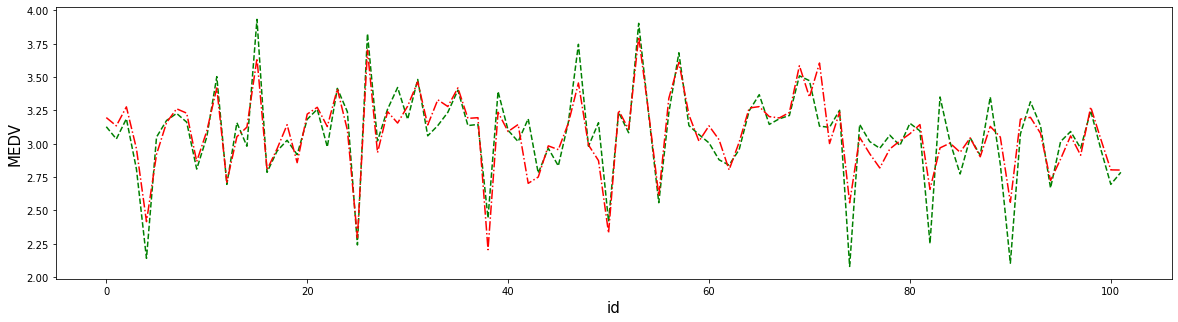

In [38]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lasso_reg_y_predict)

In [39]:
# testing set
lasso_alpha = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
for i in lasso_alpha:
    # The Lasso regression module instantiates an object
    lasso_reg = Lasso(alpha=i, max_iter=1000)#(alpha表示正则的程度）
    # Fit the training set with the Lasso regression module
    lasso_reg.fit(X_train_scaled, y_train_log)
   # Model evaluation
    lasso_reg_y_predict = lasso_reg.predict(test_X_scaled)
    lasso_reg_score = r2_score(y_test_log, lasso_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(lasso_reg_score))

alpha:0.001    R^2 score:0.7908607225
alpha:0.005    R^2 score:0.7615708813
alpha:0.01    R^2 score:0.7045562773
alpha:0.02    R^2 score:0.6562410738
alpha:0.03    R^2 score:0.6090151253
alpha:0.04    R^2 score:0.5863412030
alpha:0.05    R^2 score:0.5733204109
alpha:0.1    R^2 score:0.5041833002


### Method 4: ElasticNet regression (log)

### Without data augmentation

In [40]:
# training set
# Get the best parameters for the model
en_reg = grid_search(ElasticNet(), X_train, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# Use the best model to make predictions
en_reg_y_predict = en_reg.predict(X_test)
# Get the R^2 score of the trained model
# en_score = r2_score(y_test_log, en_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.7916181036.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7911656427
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7911517675
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7911299549
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7911892188
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7914480571
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7914652171
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7910024757
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7897407637
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7916181036
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7902122248
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7860937008


array([3.08074341, 3.18676406, 3.37554243, 2.79783265, 2.40489059,
       2.78100209, 3.20082073, 3.30956821, 3.3254179 , 2.93643662,
       3.21247009, 3.48670967, 2.53106509, 3.14461419, 3.15194114,
       3.47739188, 2.82024303, 2.94255896, 3.08315087, 2.9124471 ,
       3.28886392, 3.30413509, 3.04565409, 3.50848071, 3.05127257,
       2.00277685, 3.74193394, 2.94019169, 3.20963909, 3.21839263,
       3.29642008, 3.53232377, 3.20625867, 3.405273  , 3.29321507,
       3.51656203, 3.29437513, 3.27089158, 2.03733896, 3.3799811 ,
       3.17555947, 3.27101042, 2.78998787, 2.78769443, 3.01775092,
       2.99755586, 3.17671249, 3.56935149, 3.02769854, 2.93579796,
       2.16486956, 3.38589108, 3.20359557, 3.85091796, 3.34048688,
       2.21504838, 3.41447043, 3.66530009, 3.37731452, 3.10630967,
       3.20899643, 3.03979593, 2.85294552, 2.91507549, 3.30443113,
       3.41818955, 3.3121872 , 3.29509621, 3.24551468, 3.70093482,
       3.42314491, 3.62135894, 3.05117823, 3.33284194, 2.49609

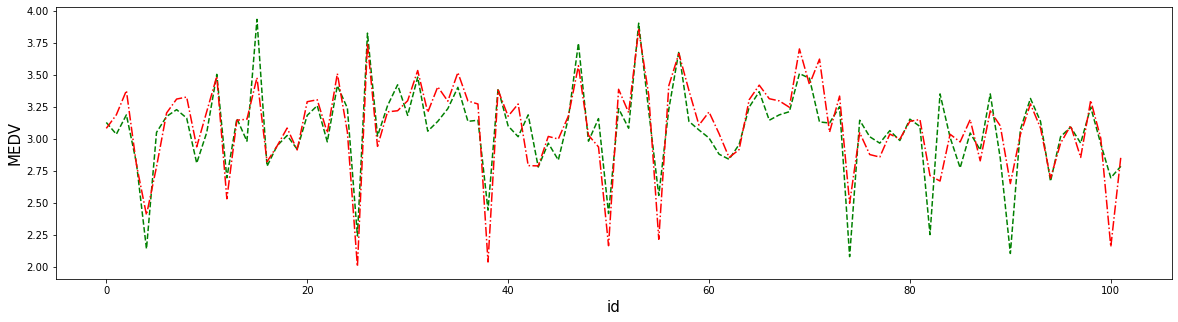

In [41]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, en_reg_y_predict)

### With data augmentation

In [42]:
# training set
# Get the best parameters for the model
en_reg = grid_search(ElasticNet(), X_train_scaled, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# Use the best model to make predictions
en_reg_y_predict = en_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# en_score = r2_score(y_test_log, en_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.8326346106.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8311385911
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8319980154
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8324465886
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.8326346106
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8314390882
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8301808141
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8279887016
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.8246829255
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8299361495
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8251842374
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8161136213

array([3.19804474, 3.12928282, 3.26831622, 2.96279008, 2.41337596,
       2.91126099, 3.15793991, 3.2554376 , 3.22669608, 2.85587285,
       3.0836163 , 3.39816718, 2.70805886, 3.04712764, 3.12671138,
       3.65096835, 2.79823952, 2.95370958, 3.14223669, 2.85293669,
       3.22272951, 3.27594886, 3.11807752, 3.40621236, 3.10607857,
       2.28583252, 3.70019722, 2.93889015, 3.24453194, 3.16627329,
       3.28520533, 3.46465453, 3.14132885, 3.34622786, 3.28448784,
       3.41896526, 3.18676195, 3.19094867, 2.19425049, 3.24399914,
       3.09047992, 3.1462983 , 2.70157121, 2.74852414, 2.98213618,
       2.949543  , 3.15639234, 3.46003501, 2.99346085, 2.872299  ,
       2.32628986, 3.24833089, 3.10803097, 3.80068282, 3.22430464,
       2.60637325, 3.34385385, 3.60443438, 3.1994746 , 3.02597366,
       3.13829859, 3.03260871, 2.80368585, 3.01174638, 3.25319074,
       3.26516622, 3.20307147, 3.18541223, 3.23251999, 3.58661567,
       3.35575615, 3.61137311, 3.00326487, 3.23606036, 2.56450

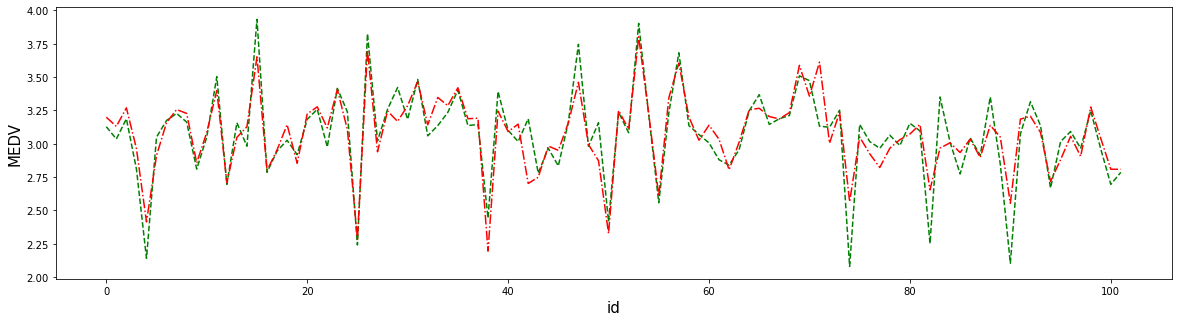

In [43]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, en_reg_y_predict)

In [44]:
# testing set
en_alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 1]
en_l1_ratio = [0.1, 0.3, 0.5, 0.7]
for i in en_alpha:
    for j in en_l1_ratio:
        # ElasticNet regression module instantiates an object
        en_reg = ElasticNet(alpha=i, l1_ratio=j, max_iter=100000)#(alpha表示正则的程度）
        # Fit the training set with the ElasticNet regression module
        en_reg.fit(X_train_scaled, y_train_log)
        # Model evaluation
        en_reg_y_predict = en_reg.predict(test_X_scaled)
        en_reg_score = r2_score(y_test_log, en_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "l1_ratio:{:,}   ".format(j), "R^2 score:{:,.10f}".format(en_reg_score))

alpha:0.001    l1_ratio:0.1    R^2 score:0.7904964995
alpha:0.001    l1_ratio:0.3    R^2 score:0.7911792594
alpha:0.001    l1_ratio:0.5    R^2 score:0.7914684316
alpha:0.001    l1_ratio:0.7    R^2 score:0.7913349209
alpha:0.005    l1_ratio:0.1    R^2 score:0.7935282305
alpha:0.005    l1_ratio:0.3    R^2 score:0.7893977894
alpha:0.005    l1_ratio:0.5    R^2 score:0.7838007053
alpha:0.005    l1_ratio:0.7    R^2 score:0.7766851368
alpha:0.01    l1_ratio:0.1    R^2 score:0.7898056255
alpha:0.01    l1_ratio:0.3    R^2 score:0.7772711180
alpha:0.01    l1_ratio:0.5    R^2 score:0.7582786407
alpha:0.01    l1_ratio:0.7    R^2 score:0.7347867527
alpha:0.05    l1_ratio:0.1    R^2 score:0.7424278533
alpha:0.05    l1_ratio:0.3    R^2 score:0.6789538044
alpha:0.05    l1_ratio:0.5    R^2 score:0.6297809349
alpha:0.05    l1_ratio:0.7    R^2 score:0.5938048222
alpha:0.1    l1_ratio:0.1    R^2 score:0.6990614698
alpha:0.1    l1_ratio:0.3    R^2 score:0.6055292611
alpha:0.1    l1_ratio:0.5    R^2 score:0

## 6.2 Integrated regression model

### Method 5: Random Forest

### Without data augmentation (Large)

In [45]:
# training set
# Get the best parameters for the model
rf_reg = grid_search(RandomForestRegressor(), X_train, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_features':[0.6,0.7,0.8,1]})
# Use the best model to make predictions
rf_reg_y_predict = rf_reg.predict(X_test)
# Get the R^2 score of the trained model
# rf_score = r2_score(y_test, rf_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_features': 0.6, 'n_estimators': 50} for the optimal model.
Optimal model has best score 0.8861009607.
{'max_features': 0.6, 'n_estimators': 5} Test score: 0.8476865536
{'max_features': 0.6, 'n_estimators': 10} Test score: 0.8662077153
{'max_features': 0.6, 'n_estimators': 20} Test score: 0.8587922442
{'max_features': 0.6, 'n_estimators': 50} Test score: 0.8861009607
{'max_features': 0.6, 'n_estimators': 100} Test score: 0.8837066974
{'max_features': 0.6, 'n_estimators': 200} Test score: 0.8856175192
{'max_features': 0.7, 'n_estimators': 5} Test score: 0.8298576288
{'max_features': 0.7, 'n_estimators': 10} Test score: 0.8642456831
{'max_features': 0.7, 'n_estimators': 20} Test score: 0.8662652752
{'max_features': 0.7, 'n_estimators': 50} Test score: 0.8829490983
{'max_features': 0.7, 'n_estimators': 100} Test score: 0.8729859460
{'max_features': 0.7, 'n_estimators': 200} Test score: 0.8815443833
{'max_features': 0.8, 'n_estimators': 5} Test score: 0.8414279080
{'max

array([21.716, 21.918, 23.774, 15.262, 11.484, 17.308, 20.6  , 24.814,
       22.422, 16.154, 20.876, 33.612, 14.75 , 21.648, 22.534, 39.734,
       15.554, 17.812, 21.606, 18.43 , 23.21 , 24.938, 21.872, 27.712,
       21.064,  8.962, 46.29 , 17.73 , 24.876, 24.57 , 26.104, 29.59 ,
       21.308, 25.112, 26.872, 28.02 , 28.03 , 24.926,  6.464, 25.028,
       20.942, 21.14 , 13.894, 12.136, 19.602, 18.892, 22.286, 39.068,
       20.714, 19.758,  7.76 , 27.44 , 21.554, 48.946, 22.646, 13.394,
       27.076, 45.9  , 24.02 , 21.102, 20.74 , 20.008, 15.056, 20.46 ,
       24.146, 29.994, 23.126, 21.902, 21.508, 32.786, 34.084, 41.64 ,
       20.264, 25.448, 13.884, 20.5  , 16.164, 14.136, 19.272, 18.396,
       20.768, 23.822, 11.15 , 18.128, 19.624, 21.028, 20.478, 16.678,
       23.104, 20.11 ,  9.454, 22.42 , 26.878, 21.154, 13.868, 18.816,
       21.014, 18.362, 24.01 , 20.364, 12.324, 14.35 ])

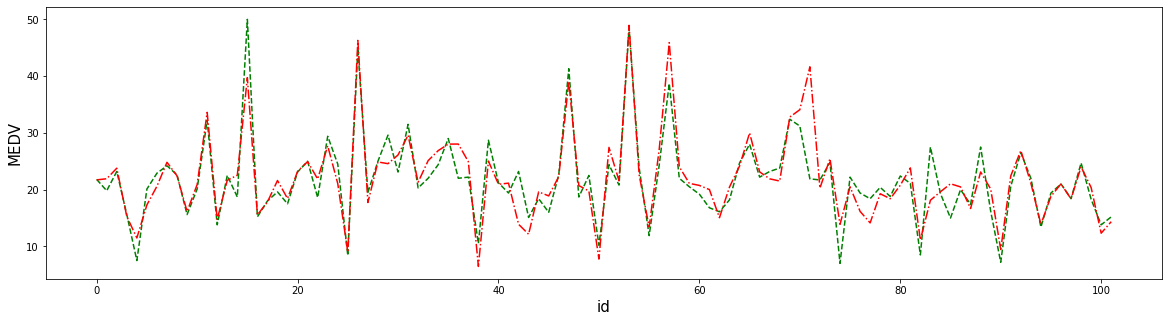

In [46]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, rf_reg_y_predict)

### With data augmentation (small)

In [47]:
# training set
# Get the best parameters for the model
rf_reg = grid_search(RandomForestRegressor(), X_train_scaled, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_features':[0.6,0.7,0.8,1]})
# Use the best model to make predictions
rf_reg_y_predict = rf_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# rf_score = r2_score(y_test, rf_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_features': 0.8, 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.7944013467.
{'max_features': 0.6, 'n_estimators': 5} Test score: 0.7165621900
{'max_features': 0.6, 'n_estimators': 10} Test score: 0.7459668393
{'max_features': 0.6, 'n_estimators': 20} Test score: 0.7752703778
{'max_features': 0.6, 'n_estimators': 50} Test score: 0.7861679454
{'max_features': 0.6, 'n_estimators': 100} Test score: 0.7891070313
{'max_features': 0.6, 'n_estimators': 200} Test score: 0.7907895743
{'max_features': 0.7, 'n_estimators': 5} Test score: 0.7165357901
{'max_features': 0.7, 'n_estimators': 10} Test score: 0.7533028825
{'max_features': 0.7, 'n_estimators': 20} Test score: 0.7615306819
{'max_features': 0.7, 'n_estimators': 50} Test score: 0.7878680510
{'max_features': 0.7, 'n_estimators': 100} Test score: 0.7878540367
{'max_features': 0.7, 'n_estimators': 200} Test score: 0.7911361310
{'max_features': 0.8, 'n_estimators': 5} Test score: 0.7312437546
{'ma

array([21.238 , 21.9995, 23.5995, 25.285 , 10.0745, 20.09  , 22.6835,
       23.921 , 23.898 , 20.136 , 21.6545, 33.7135, 24.1285, 21.848 ,
       20.2835, 40.1585, 15.209 , 17.669 , 21.833 , 18.9955, 22.9495,
       23.8525, 22.6925, 24.891 , 21.225 , 13.503 , 43.9725, 23.7825,
       21.8825, 27.83  , 26.491 , 26.1875, 20.746 , 27.603 , 24.0715,
       29.6565, 22.528 , 23.975 ,  9.9965, 22.613 , 20.528 , 23.495 ,
       19.3395, 14.0135, 18.56  , 21.0785, 22.1305, 26.0515, 24.9165,
       19.618 , 11.3375, 25.7655, 22.6185, 47.231 , 22.531 , 12.3015,
       25.448 , 40.319 , 28.67  , 22.1025, 20.5995, 19.6945, 13.9545,
       22.191 , 23.976 , 25.6795, 23.5465, 22.7175, 21.5155, 29.8735,
       26.9305, 28.353 , 21.8075, 25.182 , 16.981 , 24.5075, 19.7645,
       14.9805, 19.9115, 18.4525, 21.761 , 21.0085, 12.892 , 14.7785,
       19.7165, 25.352 , 20.247 , 16.7   , 20.9405, 20.4495, 12.697 ,
       20.6505, 23.57  , 20.071 , 17.7695, 19.524 , 22.8205, 18.1445,
       23.987 , 21.0

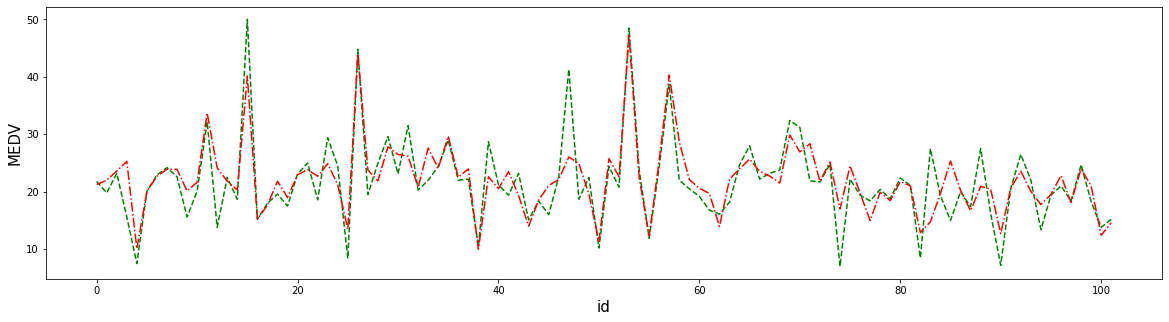

In [48]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, rf_reg_y_predict)

In [49]:
# testing set
rf_n_estimators = [5, 10, 20, 50, 100, 200]
# rf_max_depth = [3, 5, 7]
rf_max_features = [0.6, 0.7, 0.8, 1]
for i in rf_n_estimators:
    for k in rf_max_features:
        # The random forest regression module instantiates an object
        rf_reg = RandomForestRegressor(n_estimators=i, max_features=k)
        # Fit the training set with the random forest regression module
        rf_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        rf_reg_y_predict = rf_reg.predict(test_X_scaled)
        rf_reg_score = r2_score(y_test, rf_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(k), "R^2 score:{:,.10f}".format(rf_reg_score))

n_estimators:5    max_features:0.6    R^2 score:0.7078270138
n_estimators:5    max_features:0.7    R^2 score:0.7249498825
n_estimators:5    max_features:0.8    R^2 score:0.6429052187
n_estimators:5    max_features:1    R^2 score:0.3562703123
n_estimators:10    max_features:0.6    R^2 score:0.5441885949
n_estimators:10    max_features:0.7    R^2 score:0.6962710325
n_estimators:10    max_features:0.8    R^2 score:0.6027355031
n_estimators:10    max_features:1    R^2 score:0.5413415111
n_estimators:20    max_features:0.6    R^2 score:0.7470367436
n_estimators:20    max_features:0.7    R^2 score:0.6862934865
n_estimators:20    max_features:0.8    R^2 score:0.7175901894
n_estimators:20    max_features:1    R^2 score:0.5741248690
n_estimators:50    max_features:0.6    R^2 score:0.7491231603
n_estimators:50    max_features:0.7    R^2 score:0.7030666780
n_estimators:50    max_features:0.8    R^2 score:0.6956939691
n_estimators:50    max_features:1    R^2 score:0.6462017273
n_estimators:100    

### Method 6: Extra Random Forest Regression

### Without data augmentation (Large)

In [50]:
# training set
# Get the best parameters for the model
et_reg = grid_search(ExtraTreesRegressor(), X_train, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# Use the best model to make predictions
et_reg_y_predict = et_reg.predict(X_test)
# Get the R^2 score of the trained model
# et_score = r2_score(y_test, et_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 400} for the optimal model.
Optimal model has best score 0.8983381245.
{'max_features': 1, 'n_estimators': 50} Test score: 0.8366930868
{'max_features': 1, 'n_estimators': 100} Test score: 0.8309231042
{'max_features': 1, 'n_estimators': 200} Test score: 0.8356841730
{'max_features': 1, 'n_estimators': 300} Test score: 0.8370498609
{'max_features': 1, 'n_estimators': 400} Test score: 0.8352064376
{'max_features': 2, 'n_estimators': 50} Test score: 0.8737877739
{'max_features': 2, 'n_estimators': 100} Test score: 0.8653588722
{'max_features': 2, 'n_estimators': 200} Test score: 0.8683532988
{'max_features': 2, 'n_estimators': 300} Test score: 0.8702572793
{'max_features': 2, 'n_estimators': 400} Test score: 0.8713055032
{'max_features': 3, 'n_estimators': 50} Test score: 0.8760713850
{'max_features': 3, 'n_estimators': 100} Test score: 0.8871083665
{'max_features': 3, 'n_estimators': 200} Test score: 0.8852159945
{'max_features': 3, 'n_

array([21.664  , 21.85175, 23.91275, 15.74225,  9.425  , 17.74525,
       21.6505 , 24.44175, 22.87425, 17.64025, 21.76275, 33.07775,
       16.074  , 22.26775, 21.04325, 45.5485 , 16.565  , 18.4035 ,
       20.819  , 17.86375, 24.36675, 25.33875, 22.781  , 29.0575 ,
       21.0635 ,  9.36575, 45.1065 , 18.714  , 22.34825, 26.63275,
       26.696  , 32.9365 , 20.941  , 26.94   , 26.55575, 28.85475,
       23.91575, 24.295  ,  6.8345 , 25.26125, 20.871  , 22.162  ,
       14.6845 , 13.2925 , 19.68325, 19.8965 , 22.8395 , 40.01975,
       20.0305 , 20.49175,  8.209  , 27.9125 , 21.37025, 48.26175,
       24.35075, 12.20675, 27.00975, 44.068  , 25.5815 , 22.41375,
       20.88575, 20.06375, 15.26   , 21.45675, 27.22975, 29.44975,
       24.56825, 23.1765 , 22.28775, 33.42075, 32.348  , 36.6475 ,
       20.40875, 25.33975, 12.0755 , 21.37525, 17.16825, 14.63   ,
       19.55825, 19.23775, 22.51675, 21.91875, 11.318  , 15.6735 ,
       19.756  , 23.18425, 20.625  , 16.99175, 22.527  , 20.10

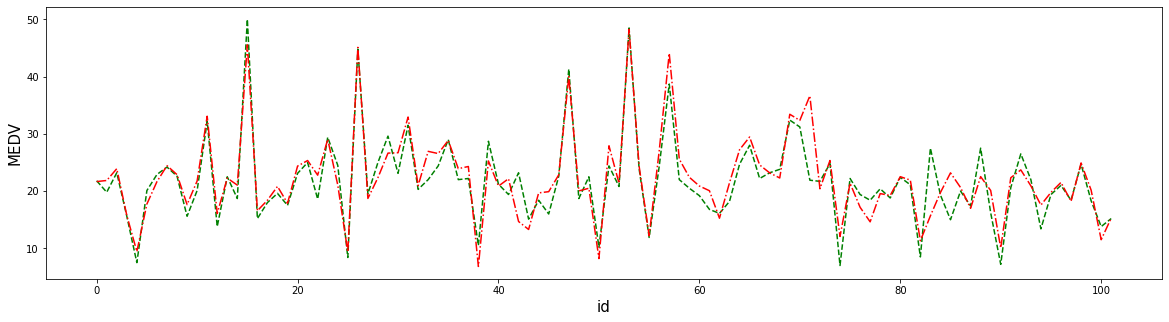

In [51]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, et_reg_y_predict)

### With data augmentation (small)

In [52]:
# training set
# Get the best parameters for the model
et_reg = grid_search(ExtraTreesRegressor(), X_train_scaled, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# Use the best model to make predictions
et_reg_y_predict = et_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# et_score = r2_score(y_test, et_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 300} for the optimal model.
Optimal model has best score 0.7418158825.
{'max_features': 1, 'n_estimators': 50} Test score: 0.5954847989
{'max_features': 1, 'n_estimators': 100} Test score: 0.5976533096
{'max_features': 1, 'n_estimators': 200} Test score: 0.6013334761
{'max_features': 1, 'n_estimators': 300} Test score: 0.5965919437
{'max_features': 1, 'n_estimators': 400} Test score: 0.5998719748
{'max_features': 2, 'n_estimators': 50} Test score: 0.6564113452
{'max_features': 2, 'n_estimators': 100} Test score: 0.6698681068
{'max_features': 2, 'n_estimators': 200} Test score: 0.6735343204
{'max_features': 2, 'n_estimators': 300} Test score: 0.6750982747
{'max_features': 2, 'n_estimators': 400} Test score: 0.6807823703
{'max_features': 3, 'n_estimators': 50} Test score: 0.6926033317
{'max_features': 3, 'n_estimators': 100} Test score: 0.7013687058
{'max_features': 3, 'n_estimators': 200} Test score: 0.7169315819
{'max_features': 3, 'n_

array([23.23933333, 22.72533333, 24.63833333, 20.008     , 11.101     ,
       20.822     , 22.38566667, 23.54833333, 25.38733333, 19.99566667,
       21.67766667, 30.678     , 18.78033333, 22.906     , 20.44666667,
       44.39133333, 15.40033333, 17.138     , 23.25033333, 19.21933333,
       23.172     , 23.52933333, 24.553     , 26.18766667, 22.12933333,
       17.32833333, 41.40366667, 20.021     , 20.92933333, 29.498     ,
       25.916     , 28.511     , 21.21633333, 26.07166667, 24.68766667,
       27.05766667, 23.146     , 24.059     , 13.10866667, 23.25633333,
       20.46133333, 25.03033333, 18.19033333, 13.52233333, 19.00733333,
       21.74133333, 23.94366667, 29.59033333, 19.76833333, 20.23133333,
       14.302     , 26.20466667, 22.56566667, 46.83066667, 23.77766667,
       18.91833333, 26.959     , 33.08233333, 26.28533333, 20.41966667,
       19.925     , 19.45233333, 14.96766667, 21.602     , 24.34266667,
       25.47733333, 26.28233333, 24.364     , 20.14633333, 29.11

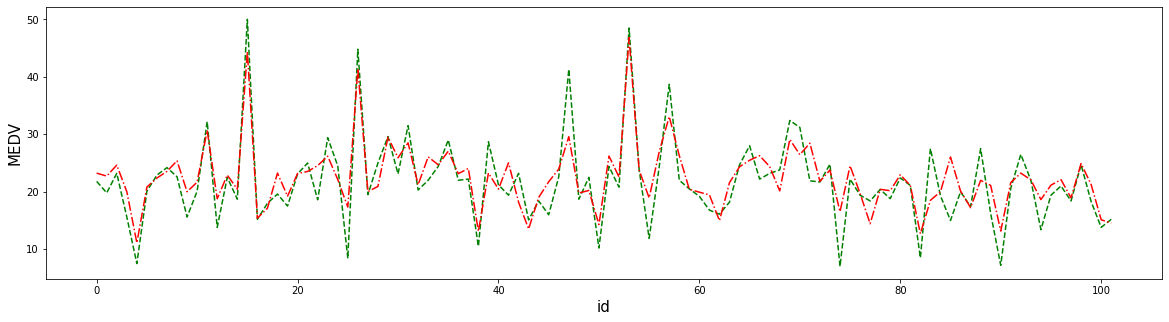

In [53]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, et_reg_y_predict)

In [54]:
# testing set
et_n_estimators = [50, 100, 200, 300, 400]
et_max_features = [1,2,3,4]
for i in et_n_estimators:
    for j in et_max_features:
        # The extra trees regression module instantiates an object
        et_reg = ExtraTreesRegressor(n_estimators=i, max_features=j)#(alpha表示正则的程度）
        # Fit the training set with the extra trees regression module
        et_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        et_reg_y_predict = et_reg.predict(test_X_scaled)
        et_reg_score = r2_score(y_test, et_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(j), "R^2 score:{:,.10f}".format(et_reg_score))

n_estimators:50    max_features:1    R^2 score:0.6664893576
n_estimators:50    max_features:2    R^2 score:0.7569849485
n_estimators:50    max_features:3    R^2 score:0.7457245382
n_estimators:50    max_features:4    R^2 score:0.7730850060
n_estimators:100    max_features:1    R^2 score:0.7231893400
n_estimators:100    max_features:2    R^2 score:0.7220349676
n_estimators:100    max_features:3    R^2 score:0.7546776982
n_estimators:100    max_features:4    R^2 score:0.7621941527
n_estimators:200    max_features:1    R^2 score:0.7075131574
n_estimators:200    max_features:2    R^2 score:0.7427155242
n_estimators:200    max_features:3    R^2 score:0.7425700813
n_estimators:200    max_features:4    R^2 score:0.7705822403
n_estimators:300    max_features:1    R^2 score:0.7118020627
n_estimators:300    max_features:2    R^2 score:0.7342400076
n_estimators:300    max_features:3    R^2 score:0.7562644055
n_estimators:300    max_features:4    R^2 score:0.7617177476
n_estimators:400    max_feat

### Method 7: Gradient Boosting Regression

### Without data augmentation (Large)

In [55]:
# training set
# Get the best parameters for the model
gb_reg = grid_search(GradientBoostingRegressor(), X_train, y_train, {'n_estimators':[50,100,200,300], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# Use the best model to make predictions
gb_reg_y_predict = gb_reg.predict(X_test)
# Get the R^2 score of the trained model
gb_score = r2_score(y_test, gb_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 200, 'subsample': 1} for the optimal model.
Optimal model has best score 0.8898369438.
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.8208208515
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.8671179735
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.8811296860
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.8751995219
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0.8674573551
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 100, 'subsample': 1} Test score: 0.8803783721
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 200, 'subsample': 1} Test score: 0.8767947939
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 300, 'subsample': 1} Test score: 0.8893252123
{'learning

array([20.32426301, 22.28733375, 23.58492849, 15.31995829,  8.50608538,
       17.70374036, 20.81005202, 24.22593515, 24.27691671, 14.7579059 ,
       20.99486526, 32.9228248 , 13.58537489, 23.03239407, 22.82424504,
       38.94989057, 16.65359241, 15.67890295, 20.12932545, 17.28150657,
       22.13340393, 24.55565396, 21.66464223, 31.41133055, 20.30140734,
        7.07427431, 46.8522447 , 12.93992158, 26.66542004, 28.2736918 ,
       25.60542718, 31.71346702, 21.27968015, 24.77784735, 25.41570221,
       27.63598852, 24.02899687, 22.4170071 ,  4.71717102, 22.33298304,
       20.42574827, 21.7705648 , 13.01804808, 11.1180953 , 19.75030997,
       15.48337174, 23.09473266, 36.69912055, 16.3997362 , 19.69489824,
        6.90168178, 27.5403747 , 21.35853994, 50.82665341, 24.22595256,
       16.05172344, 26.76712986, 42.06996734, 24.31847301, 16.87442761,
       18.00219149, 17.50253234, 14.98636677, 19.68482004, 24.42573979,
       28.1431444 , 25.34756259, 24.01656812, 21.05276476, 33.65

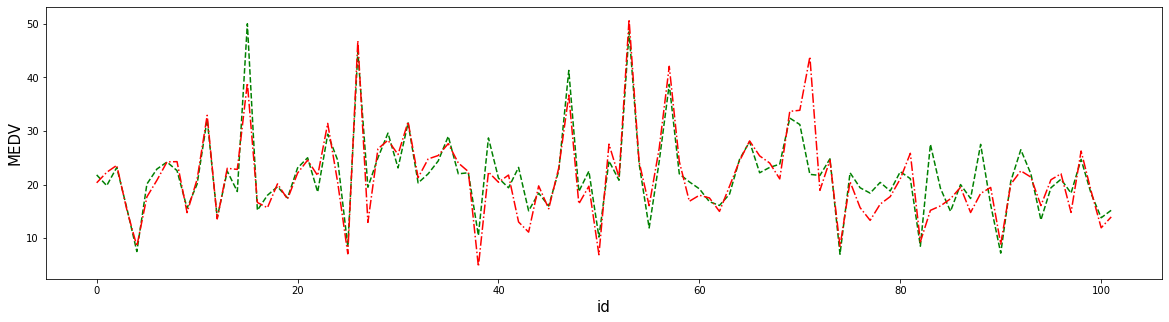

In [56]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, gb_reg_y_predict)

### With data augmentation (small)

In [57]:
# training set
# Get the best parameters for the model
gb_reg = grid_search(GradientBoostingRegressor(), X_train_scaled, y_train, {'n_estimators':[50,100,200,300], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# Use the best model to make predictions
gb_reg_y_predict = gb_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# gb_score = r2_score(y_test, gb_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 200, 'subsample': 1} for the optimal model.
Optimal model has best score 0.7800489773.
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.5395379896
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.6355615589
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.7117980693
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.7199251423
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0.6075802237
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 100, 'subsample': 1} Test score: 0.7187805493
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 200, 'subsample': 1} Test score: 0.7531876913
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 300, 'subsample': 1} Test score: 0.7649490002
{'learning

array([22.86122259, 22.03296409, 23.88091937, 23.07845935, 10.76156461,
       18.53136439, 20.4228099 , 23.64757269, 24.106384  , 17.96371843,
       19.49420606, 33.48410042, 16.41772643, 22.28807801, 22.09049962,
       42.75470499, 16.13816535, 17.68389772, 23.59256922, 17.57547741,
       22.8868718 , 21.83206186, 23.51282825, 27.99441893, 21.1081274 ,
       13.26215256, 37.62499146, 18.43377765, 23.71117403, 26.88795217,
       24.1395787 , 33.23822707, 22.87009123, 27.24279035, 25.36525417,
       28.1541839 , 23.39687277, 24.31038941,  8.53369138, 25.89698585,
       19.53260173, 23.75704468, 19.3329496 , 13.06512465, 19.6590372 ,
       18.94324285, 23.62194631, 30.29728894, 17.97910728, 17.84638094,
        9.43579205, 24.23190826, 22.98815252, 48.09501145, 25.90356585,
       16.21487203, 30.7783475 , 35.28556693, 27.22928811, 20.76606414,
       20.79257245, 21.59197711, 13.33465656, 21.87705031, 23.15601489,
       25.82334649, 23.97338934, 25.85635676, 22.86097276, 29.62

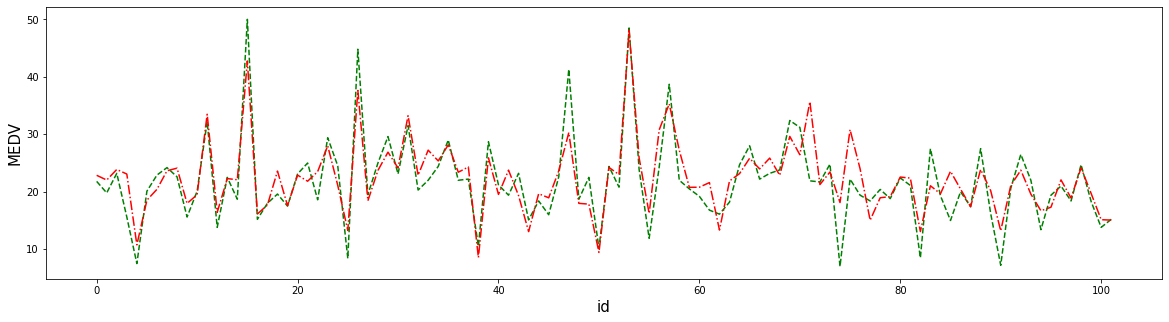

In [58]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, gb_reg_y_predict)

In [59]:
# testing set
gb_n_estimators = [50, 100, 200, 300]
# gb_max_depth = [3, 4, 5, 6]
gb_max_features = [1, 2, 3]
for i in gb_n_estimators:
    for k in gb_max_features:
        # The gradient boosting regression module instantiates an object
        gb_reg = GradientBoostingRegressor(n_estimators=i, max_features=k, subsample=1)
        # Fit the training set with the gradient boosting regression module
        gb_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        gb_reg_y_predict = gb_reg.predict(test_X_scaled)
        gb_reg_score = r2_score(y_test, gb_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(k), "subsample:1   learning_rate:0.1   ", "R^2 score:{:,.10f}".format(gb_reg_score))

n_estimators:50    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.5772090468
n_estimators:50    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6485053366
n_estimators:50    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6628193069
n_estimators:100    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.6845890189
n_estimators:100    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.7392020881
n_estimators:100    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.7041700108
n_estimators:200    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.7195791567
n_estimators:200    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6913541755
n_estimators:200    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.7358161095
n_estimators:300    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.7666423930
n_estimators:300    max_features:2    subsa

## 6.3SVM

### Method 8: SVR

### Without data augmentation (Large)

In [60]:
# training set
# Get the best parameters for the model
svr_reg = grid_search(SVR(), X_train, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# Use the best model to make predictions
svr_reg_y_predict = svr_reg.predict(X_test)
# Get the R^2 score of the trained model
# svr_score = r2_score(y_test, svr_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 50, 'gamma': 0.1} for the optimal model.
Optimal model has best score 0.8662486054.
{'C': 10, 'gamma': 0.01} Test score: 0.7811292139
{'C': 10, 'gamma': 0.1} Test score: 0.8181581087
{'C': 10, 'gamma': 0.125} Test score: 0.8087491585
{'C': 10, 'gamma': 0.25} Test score: 0.7629039553
{'C': 10, 'gamma': 0.5} Test score: 0.6834551518
{'C': 10, 'gamma': 1} Test score: 0.5509683296
{'C': 20, 'gamma': 0.01} Test score: 0.8107601630
{'C': 20, 'gamma': 0.1} Test score: 0.8494442077
{'C': 20, 'gamma': 0.125} Test score: 0.8443662561
{'C': 20, 'gamma': 0.25} Test score: 0.8026154560
{'C': 20, 'gamma': 0.5} Test score: 0.7345633840
{'C': 20, 'gamma': 1} Test score: 0.6197812614
{'C': 50, 'gamma': 0.01} Test score: 0.8374376343
{'C': 50, 'gamma': 0.1} Test score: 0.8662486054
{'C': 50, 'gamma': 0.125} Test score: 0.8579461468
{'C': 50, 'gamma': 0.25} Test score: 0.8192099532
{'C': 50, 'gamma': 0.5} Test score: 0.7493905126
{'C': 50, 'gamma': 1} Test score: 0.6319852771
{'C': 1

array([19.87152924, 20.49538081, 22.76739038, 12.54787684,  9.82736901,
       21.98367367, 21.29309241, 26.07090932, 24.42224271, 21.79482628,
       20.56534147, 37.58625319, 14.96653895, 22.55501123, 21.25131727,
       49.60950627, 16.67223368, 18.22640626, 21.03621126, 17.55021438,
       24.52687778, 25.86172233, 21.74697088, 33.28946477, 24.0598071 ,
        7.85099503, 48.37653217, 19.79218709, 21.3043241 , 27.84433588,
       25.26307779, 33.76602033, 20.40853171, 28.21604537, 25.91008698,
       29.85578926, 23.89266659, 24.13590474,  6.44070549, 31.65943457,
       21.489549  , 20.43729266, 15.3600287 , 14.13928301, 19.46629955,
       18.04453344, 23.23857755, 39.73238623, 18.71074118, 18.93600589,
        6.13525701, 28.09144119, 22.59007192, 50.13806378, 24.176318  ,
        9.23253001, 25.27232473, 43.06364439, 25.4097323 , 21.04417501,
       19.57099518, 20.35341696, 15.07724554, 19.77554318, 25.07224111,
       30.85570909, 24.88681986, 24.92096374, 22.3170558 , 34.00

In [61]:
# submission = {"prediction":svr_reg_y_predict}
# submission = pd.DataFrame(submission)
# submission.to_csv('svr_regression.csv')

In [62]:
import joblib
joblib.dump(svr_reg, "./test.pkl")

['./test.pkl']

In [63]:
estimator = joblib.load("./test.pkl")
# estimator_y_predict = estimator.predict(X_test)
# estimator_score = r2_score(y_test, estimator_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(estimator_score))
# X_train = transfer.fit_transform(X_train)
# X_test = transfer.fit_transform(X_test)
# print(X_test[0])
# X_test0 = [[]]
# X_test0[1][13]=X_test[0]
# X_test0[0] = X_test[0]
print(X_test0)
y_predict = estimator.predict(X_test0)
print(y_predict)
print(y_predict[0])
# estimator_y_predict

[[ 0.12722226 -0.44099479  1.02862428 ...  0.82571281  0.33986867
  -0.34642743]
 [ 0.12722226 -0.44099479  1.02862428 ...  0.82571281  0.33986867
  -0.34642743]
 [-0.48619175 -0.44099479 -1.21483405 ... -0.81557248 -0.0142874
  -0.54864787]
 ...
 [-0.43687423 -0.44099479 -0.24105839 ...  0.32835363  0.39775537
   0.21309981]
 [ 1.96102694 -0.44099479  1.02862428 ...  0.82571281  0.39775537
   3.35587915]
 [ 0.7074143  -0.44099479  1.02862428 ...  0.82571281 -0.20743699
   0.76502477]]
[19.9476608  19.9476608  20.49589828 22.81005876 12.56296665  9.82384935
 21.94105272 21.27253521 26.13701044 24.47133451 21.86669513 20.53895762
 37.72060675 15.06995368 22.57074851 21.25347465 49.72968853 16.60701972
 18.19337583 20.99748281 17.48073521 24.567994   25.91852189 21.74478961
 33.40027002 24.02547046  7.81072737 48.49173015 19.72289164 21.28154814
 27.87571849 25.40173388 33.90464184 20.41162943 28.26566702 25.97457425
 29.82642695 23.92682166 24.19648405  6.34714713 31.70841704 21.457332


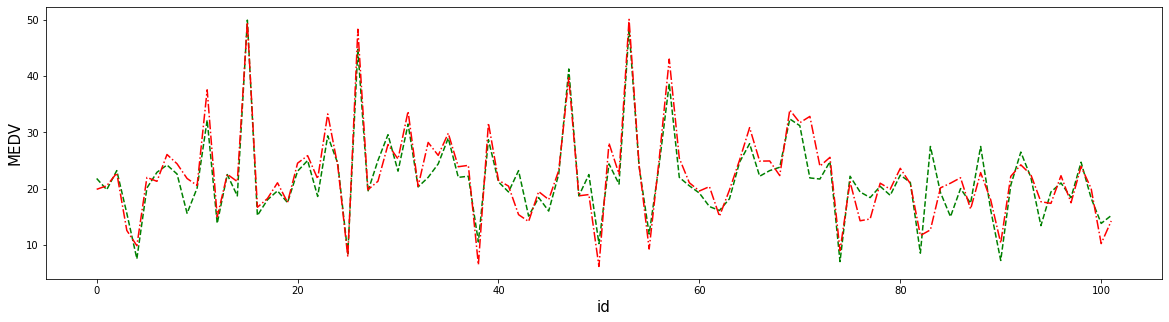

In [64]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, svr_reg_y_predict)

### With data augmentation (small)

In [65]:
# training set
# Get the best parameters for the model
svr_reg = grid_search(SVR(), X_train_scaled, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# Use the best model to make predictions
svr_reg_y_predict = svr_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# svr_score = r2_score(y_test, svr_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 100, 'gamma': 0.01} for the optimal model.
Optimal model has best score 0.8645684855.
{'C': 10, 'gamma': 0.01} Test score: 0.8010347895
{'C': 10, 'gamma': 0.1} Test score: 0.5492510451
{'C': 10, 'gamma': 0.125} Test score: 0.5008860771
{'C': 10, 'gamma': 0.25} Test score: 0.3922005577
{'C': 10, 'gamma': 0.5} Test score: 0.3297913623
{'C': 10, 'gamma': 1} Test score: 0.2616565117
{'C': 20, 'gamma': 0.01} Test score: 0.8382139984
{'C': 20, 'gamma': 0.1} Test score: 0.6136445103
{'C': 20, 'gamma': 0.125} Test score: 0.5685536158
{'C': 20, 'gamma': 0.25} Test score: 0.4689384502
{'C': 20, 'gamma': 0.5} Test score: 0.4073685062
{'C': 20, 'gamma': 1} Test score: 0.3367003443
{'C': 50, 'gamma': 0.01} Test score: 0.8614814422
{'C': 50, 'gamma': 0.1} Test score: 0.6274674846
{'C': 50, 'gamma': 0.125} Test score: 0.5816690399
{'C': 50, 'gamma': 0.25} Test score: 0.4782924329
{'C': 50, 'gamma': 0.5} Test score: 0.4195948345
{'C': 50, 'gamma': 1} Test score: 0.3555154171
{'C':

array([18.33654988, 17.93832916, 23.04223578, 18.51899606,  9.7419551 ,
       15.98036643, 22.28875247, 24.18884814, 23.55341664, 16.03224263,
       18.87769034, 35.47417221, 19.35828364, 21.88033702, 19.51131713,
       49.0898491 , 16.08333096, 17.77426858, 18.98290123, 17.44103868,
       23.38088084, 25.73114854, 20.81960411, 30.31752379, 21.49852056,
        9.98690596, 41.79427984, 19.62123358, 19.50187411, 26.82386638,
       23.61746426, 32.41773247, 21.27121879, 25.64943612, 24.72237024,
       27.76518552, 22.85451152, 23.93502363,  6.26504591, 23.78526711,
       21.12220824, 21.81717101, 16.97107472, 13.90037731, 19.22904786,
       18.2024244 , 25.63762897, 32.84266216, 20.3906193 , 18.40056482,
        6.78213651, 24.90183894, 20.15437265, 48.38675758, 23.08712747,
       19.27749477, 26.73194208, 38.87465743, 26.57370558, 20.47313514,
       20.13613425, 20.05493399, 15.05883302, 19.08576782, 24.58572682,
       27.952842  , 25.09626458, 25.56185005, 19.9335175 , 33.93

In [66]:
#testing set
svr_C = [10, 20, 50, 100]
svr_gamma = [0.01, 0.1, 0.125, 0.25, 0.5 ,1]
for i in svr_C:
    for j in svr_gamma:
        # The SVR module instantiates an object
        svr_reg =SVR(C=i, gamma=j)
        # Fit on the training set with the SVR module
        svr_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        svr_reg_y_predict = svr_reg.predict(test_X_scaled)
        svr_reg_score = r2_score(y_test, svr_reg_y_predict)
        print ("C:{:,}   ".format(i), "gamma:{:,}   ".format(j), "R^2 score:{:,.10f}".format(svr_reg_score))

C:10    gamma:0.01    R^2 score:0.7604639948
C:10    gamma:0.1    R^2 score:0.6522582274
C:10    gamma:0.125    R^2 score:0.6161722263
C:10    gamma:0.25    R^2 score:0.5236546008
C:10    gamma:0.5    R^2 score:0.4732405483
C:10    gamma:1    R^2 score:0.4203631920
C:20    gamma:0.01    R^2 score:0.7876354594
C:20    gamma:0.1    R^2 score:0.6800391399
C:20    gamma:0.125    R^2 score:0.6480686899
C:20    gamma:0.25    R^2 score:0.5576993948
C:20    gamma:0.5    R^2 score:0.5221585693
C:20    gamma:1    R^2 score:0.4881395729
C:50    gamma:0.01    R^2 score:0.8074835848
C:50    gamma:0.1    R^2 score:0.6767554052
C:50    gamma:0.125    R^2 score:0.6438990362
C:50    gamma:0.25    R^2 score:0.5522193959
C:50    gamma:0.5    R^2 score:0.5170708666
C:50    gamma:1    R^2 score:0.4930331225
C:100    gamma:0.01    R^2 score:0.8030290424
C:100    gamma:0.1    R^2 score:0.6766133398
C:100    gamma:0.125    R^2 score:0.6437759491
C:100    gamma:0.25    R^2 score:0.5505117326
C:100    gamma:0.5

### 6.4 Method 9: K-nearest neighbors

### Without data augmentation (Large)

In [67]:
# training set
# Get the best parameters for the model
knn_reg = grid_search(KNeighborsRegressor(), X_train, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# Use the best model to make predictions
knn_reg_y_predict = knn_reg.predict(X_test)
# Get the R^2 score of the trained model
# knn_score = r2_score(y_test, knn_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 2, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7992073573.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7773166813
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7992073573
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7528970176
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7828926306
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5980134330
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6504070754
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4927007021
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5584023006


array([20.87334007, 20.97900864, 24.83077808, 14.35673161,  7.91994102,
       20.08316087, 18.9       , 23.15397802, 24.12767545, 16.21036531,
       21.42933513, 43.14120429, 14.06232436, 22.25037019, 18.74598471,
       50.        , 15.05339763, 17.4938444 , 19.49920986, 18.34315548,
       22.91002214, 23.45351127, 22.78958991, 36.15561564, 21.54032728,
        7.9243468 , 47.54986182, 19.45980903, 21.19555254, 29.27153996,
       28.6328758 , 38.05656741, 20.61227775, 22.71896923, 25.53724315,
       26.35135165, 23.67968725, 24.19816285,  6.6957538 , 23.31997032,
       20.25980395, 23.83503983, 15.55907678, 13.24796983, 19.02398335,
       18.163155  , 26.470149  , 50.        , 18.602199  , 18.7828905 ,
        7.98408193, 27.53065698, 21.33239752, 50.        , 25.30633246,
        6.75084858, 20.78461397, 44.94160797, 27.10267562, 21.01200845,
       19.78826263, 19.58044055, 14.8509593 , 20.29241903, 23.41453741,
       28.0472898 , 24.59023769, 24.13485514, 20.14319096, 33.13

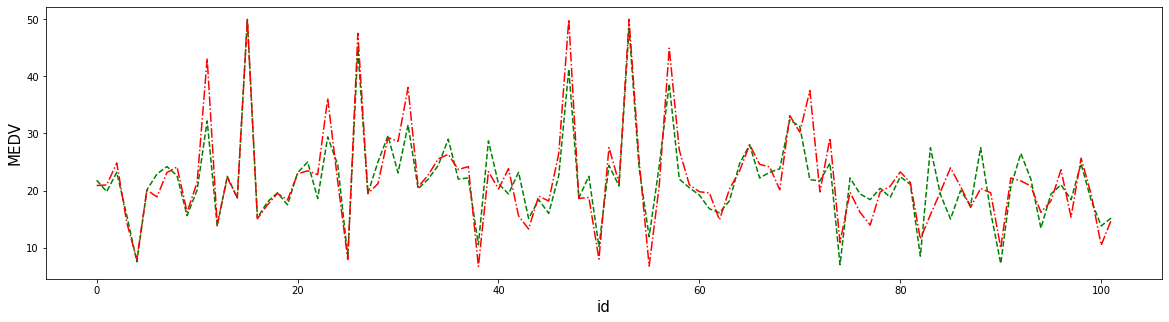

In [68]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, knn_reg_y_predict)

### With data augmentation (small)

In [69]:
# training set
# Get the best parameters for the model
knn_reg = grid_search(KNeighborsRegressor(), X_train_scaled, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# Use the best model to make predictions
knn_reg_y_predict = knn_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# knn_score = r2_score(y_test, knn_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 10, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7506083139.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7112834089
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7143073138
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7030020742
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7506083139
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5820490262
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6478412464
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4639334218
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5443023989


array([23.75782914, 20.48405715, 26.46875588, 16.22142917,  9.96793128,
       24.03330109, 21.21200894, 23.66775217, 26.19762794, 18.45372263,
       21.3861878 , 36.20251639, 16.21643976, 24.08428221, 20.29661291,
       40.78586224, 14.63466645, 18.261903  , 22.74087617, 17.90474004,
       22.73894731, 22.62660313, 25.83775191, 27.12992032, 21.17192357,
       11.45084879, 40.34496782, 17.77735763, 19.17830115, 27.55395931,
       24.79598485, 28.12380951, 20.6270398 , 27.31834587, 24.51683288,
       26.9094298 , 20.49745902, 23.08743397, 12.30417274, 21.24219491,
       20.06736029, 28.57906162, 15.92086499, 13.25330757, 18.73120361,
       20.99988938, 23.48096127, 34.06354368, 17.40800393, 17.73042845,
       12.02864963, 28.61320712, 20.90751792, 45.94890678, 24.28173389,
       20.07992169, 33.0320154 , 38.11655038, 29.92032442, 19.6696351 ,
       19.85608582, 19.15281034, 13.76345271, 22.61096143, 24.50980324,
       24.10513947, 26.29448128, 24.57063823, 19.05587807, 29.37

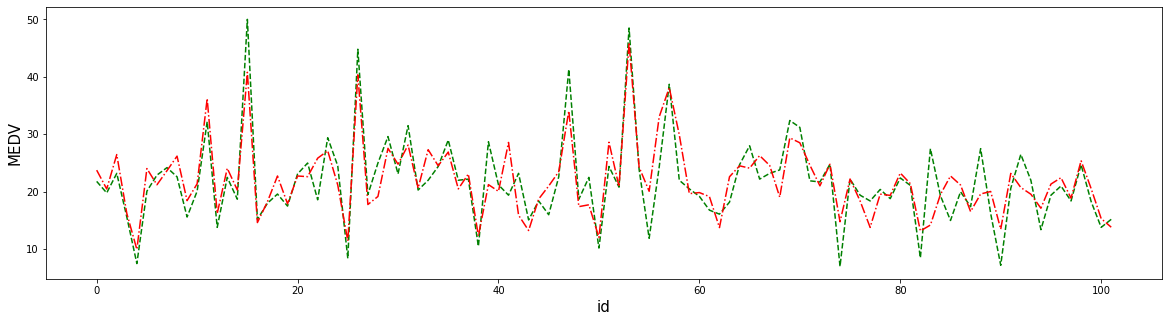

In [70]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, knn_reg_y_predict)

In [71]:
# testing set
knn_weights = ['uniform', 'distance']
knn_n_neighbors = [2, 10, 50 ,100]
for i in knn_weights:
    for j in knn_n_neighbors:
        # The KNeighbors regression module instantiates an object
        knn_reg =KNeighborsRegressor(weights=i, n_neighbors=j)
        # Fit on the training set with the KNeighbors regression module
        knn_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        knn_reg_y_predict = knn_reg.predict(test_X_scaled)
        knn_reg_score = r2_score(y_test, knn_reg_y_predict)
        print ("weights:{}   ".format(i), "n_neighbors:{:,}   ".format(j), "R^2 score:{:,.10f}".format(knn_reg_score))

weights:uniform    n_neighbors:2    R^2 score:0.5271325106
weights:uniform    n_neighbors:10    R^2 score:0.6269544493
weights:uniform    n_neighbors:50    R^2 score:0.4740070124
weights:uniform    n_neighbors:100    R^2 score:0.3996548030
weights:distance    n_neighbors:2    R^2 score:0.5155234722
weights:distance    n_neighbors:10    R^2 score:0.7248185037
weights:distance    n_neighbors:50    R^2 score:0.6020968782
weights:distance    n_neighbors:100    R^2 score:0.5228557837


### 6.5 Method 10: Kernel Ridge Regression

### Without data augmentation (Large)

In [72]:
# training set
# Get the best parameters for the model
kridge_reg = grid_search(KernelRidge(),X_train,y_train,{'alpha':[0.3,0.5,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# Use the best model to make predictions
kridge_reg_y_predict = kridge_reg.predict(X_test)
# Get the R^2 score of the trained model
# kridge_score = r2_score(y_test, kridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8816650238.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8711053344
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8702103945
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8668731855
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8609338024
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8568511150
{'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8787069944
{'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8780593981
{'alpha': 0.5, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8750872794
{'alpha': 0.5, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8700704457
{'alpha': 0.5, 'coef0': 8, 'degree': 3, 'kernel'

array([24.44297955, 20.72907747, 24.28532545, 15.55751478,  7.027411  ,
       18.70658843, 20.9745426 , 26.69788697, 24.21075414, 14.62713738,
       21.28067667, 35.74156383, 18.34593805, 23.30766748, 21.64332136,
       56.9638935 , 15.30728125, 18.32742974, 23.62545916, 16.52478644,
       24.45060254, 25.57532217, 20.12469114, 32.61296685, 21.31713485,
        6.0289051 , 49.82106055, 18.10877812, 22.53019854, 25.96418869,
       26.40260839, 32.73642518, 20.9290007 , 27.41290184, 26.28183973,
       29.00872088, 24.71547373, 23.85789955,  3.38530598, 28.02370903,
       20.98244776, 20.59708919, 14.10983493, 16.32511834, 17.74564134,
       17.6696845 , 22.71549123, 39.95684277, 17.83909082, 17.91459286,
        4.97314672, 27.30007309, 21.71473905, 55.22590919, 24.85683138,
       11.77027576, 29.31831877, 48.99023881, 26.5480726 , 20.13260083,
       20.81331038, 18.75292452, 14.64929889, 19.87015127, 26.09550949,
       30.28913504, 25.27095534, 24.62279425, 25.19843193, 34.57

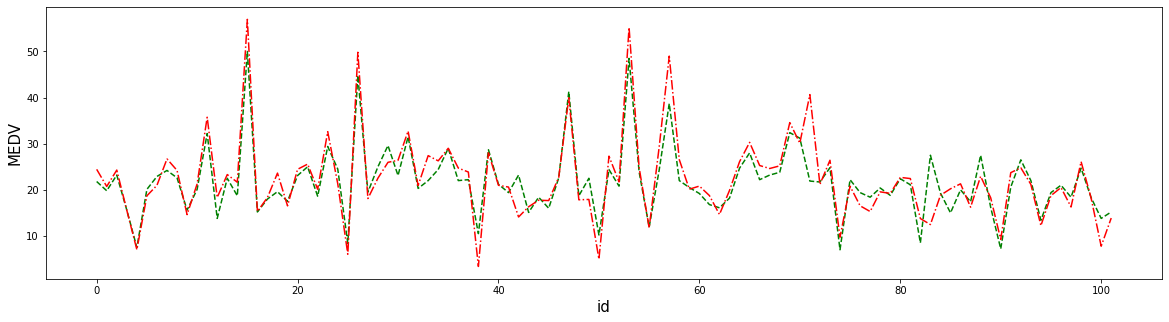

In [73]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, kridge_reg_y_predict)

### With data augmentation (small)

In [74]:
# training set
# Get the best parameters for the model
kridge_reg = grid_search(KernelRidge(),X_train_scaled,y_train,{'alpha':[0.3,0.4,0.5,0.6,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# Use the best model to make predictions
kridge_reg_y_predict = kridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# kridge_score = r2_score(y_test, kridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8716064707.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8637464675
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8613739066
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8477819235
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8114925914
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.7820395945
{'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8675497624
{'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8660624015
{'alpha': 0.4, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8552146253
{'alpha': 0.4, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8243842011
{'alpha': 0.4, 'coef0': 8, 'degree': 3, 'kernel': 

array([18.91927413, 19.05565385, 24.10934089, 16.46254956,  9.61144081,
       17.99817257, 21.93212705, 24.47152724, 25.11944251, 13.54099184,
       20.04293333, 34.6519182 , 19.73320457, 21.95533275, 20.03631785,
       48.91373355, 15.72088599, 18.91201803, 21.42992524, 16.49005633,
       22.74999964, 24.13638193, 21.19182675, 30.03156488, 21.62659188,
        5.39031182, 42.62474057, 17.87742759, 20.68807592, 26.93919889,
       23.41992907, 31.41983748, 20.99004424, 24.88368272, 24.87620816,
       28.50301407, 21.99039746, 23.27318422,  6.22266174, 23.6684088 ,
       20.36853416, 19.96544448, 15.50448855, 14.3081282 , 18.90231679,
       17.41750212, 25.82180763, 32.32806249, 18.98786745, 18.20126088,
        7.06993534, 25.58146494, 20.36085483, 48.6357014 , 23.83440613,
       17.83560103, 27.80413719, 39.53513065, 27.70120641, 20.00106073,
       20.03005154, 20.68726352, 14.74298805, 18.54687197, 25.03074832,
       27.31752527, 24.72577836, 25.48612038, 21.02606579, 33.54

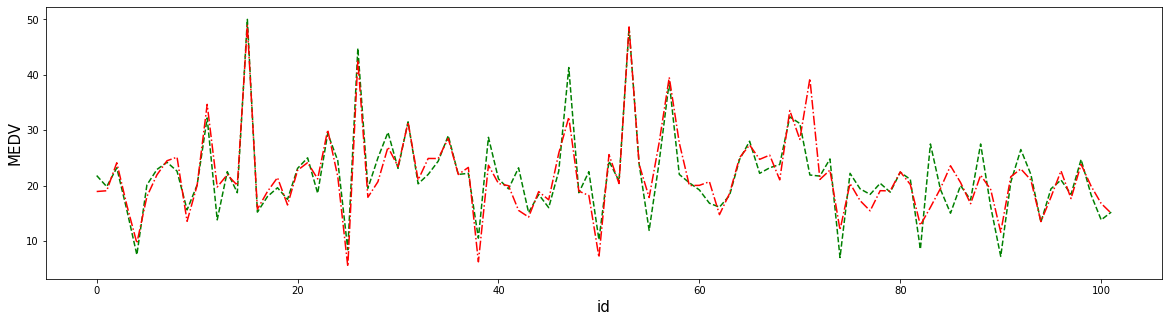

In [75]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, kridge_reg_y_predict)

In [76]:
# testing set
kridge_alpha = [0.3, 0.5,  0.7]
kridge_coef0 = [0.8, 1, 2, 5, 8]
for i in kridge_alpha:
    for j in kridge_coef0:
        # The kernel ridge regression module instantiates an object
        kridge_reg = KernelRidge(alpha=i, coef0=j, kernel = 'polynomial', degree=3)#(alpha表示正则的程度）
        # Fit on the training set with the kernel ridge regression module
        kridge_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        kridge_reg_y_predict = kridge_reg.predict(test_X_scaled)
        kridge_reg_score = r2_score(y_test, kridge_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "coef0:{:,}   ".format(j), "kernel:polynomial   degree:3   ""R^2 score:{:,.10f}".format(kridge_reg_score))

alpha:0.3    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7908831733
alpha:0.3    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7866481926
alpha:0.3    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7609347766
alpha:0.3    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7090379451
alpha:0.3    coef0:8    kernel:polynomial   degree:3   R^2 score:0.6782887490
alpha:0.5    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7938383007
alpha:0.5    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7914791405
alpha:0.5    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7710343265
alpha:0.5    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7254588124
alpha:0.5    coef0:8    kernel:polynomial   degree:3   R^2 score:0.6982021771
alpha:0.7    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7948569519
alpha:0.7    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7939256015
alpha:0.7    coef0:2    kernel:polynomial   degree:3   R^2